# About the Dataset

Novel DNA sequencing technologies have proliferated over the past two decades. Continual improvements in “next-generation sequencing” (NGS) and “third-generation sequencing” (TGS) have increased the fidelity and rate of sequencing, but it still takes hours or days to obtain complete sequences. Furthermore, there are some diagnostic applications in which very rapid identification of a particular gene or genetic species becomes essential, while identification of all genes is not necessary. For example, in patients with septic shock from bacterial infections, identification of antibiotic-resistance genes is essential because the mortality rate increases 7.6% per hour of delay in administering correct antibiotics. Unfortunately, it takes more than 24 h to grow up the bacteria recovered from the blood of an infected patient, identify the species, and then determine to which antibiotics the organism is resistant, leading to a very high mortality rate for such infections.

Bacterial antibiotic resistance is becoming a significant health threat, and rapid identification of antibiotic-resistant bacteria is essential to save lives and reduce the spread of antibiotic resistance.

# Goal

To create a machine learning algorithm that classifies 10 different bacteria species using the data from a genomic analysis technique by comparison to available bacterial DNA sequences.

[link to kaggle upload](https://www.kaggle.com/datasets/gauravduttakiit/genetic-bacteria-identification)

Not much information is given on what the columns actually represent, but the uploader was kind enough to split the dataset.
That being said, let's upload the train and test sets but only peak at the training set. We will save the test set for something else.

In [1]:
#importing libraries (others will be uploaded as needed)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_file = 'genetic_bacteria_train_dataset.csv'

#create train dataframe
df_train = pd.read_csv(train_file)
df_train

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,197019,4.630000e-08,2.460000e-06,3.080000e-06,0.000063,0.000150,1.296740e-04,0.000110,0.000074,0.000003,...,0.000040,0.000030,0.000043,0.000055,0.000028,0.000001,0.000005,9.460000e-06,4.630000e-08,Salmonella_enterica
1,28056,-9.540000e-07,-5.540000e-06,3.080000e-06,0.000048,0.000087,3.870000e-05,0.000055,0.000041,-0.000009,...,0.000116,0.000068,0.000142,0.000125,0.000093,0.000009,0.000012,3.250000e-05,4.630000e-08,Escherichia_coli
2,8210,-9.540000e-07,1.050000e-05,1.710000e-05,-0.000004,-0.000020,7.970000e-05,-0.000030,0.000036,-0.000043,...,0.000054,0.000097,0.000064,0.000114,-0.000003,-0.000010,0.000021,4.630000e-07,-9.540000e-07,Streptococcus_pneumoniae
3,98476,4.630000e-08,1.460000e-06,8.470000e-08,0.000008,0.000030,2.970000e-05,0.000036,0.000022,0.000003,...,0.000048,0.000025,0.000039,0.000042,0.000019,0.000004,0.000002,4.460000e-06,4.630000e-08,Escherichia_coli
4,166342,-9.540000e-07,4.630000e-07,-1.290000e-05,0.000036,0.000060,-3.260000e-07,-0.000040,0.000066,-0.000033,...,0.000134,0.000087,0.000134,0.000134,0.000037,0.000010,0.000010,4.050000e-05,-9.540000e-07,Escherichia_fergusonii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,105992,-9.540000e-07,-9.540000e-06,-4.290000e-05,-0.000114,0.000800,1.759674e-03,-0.000200,0.001886,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-9.540000e-06,-9.540000e-07,Klebsiella_pneumoniae
23996,44666,2.050000e-06,-4.540000e-06,-2.190000e-05,-0.000072,-0.000116,-1.483260e-04,-0.000117,-0.000066,-0.000022,...,0.000920,0.000559,0.001253,0.001685,0.001240,0.000180,0.000271,3.074630e-04,4.630000e-08,Campylobacter_jejuni
23997,3294,-9.540000e-07,-9.540000e-06,-4.290000e-05,-0.000114,-0.000200,-2.403260e-04,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,0.009957,-0.000010,-0.000010,-9.540000e-06,-9.540000e-07,Bacteroides_fragilis
23998,68080,-9.540000e-07,-8.540000e-06,-4.090000e-05,-0.000112,-0.000194,-2.263260e-04,-0.000192,-0.000110,-0.000043,...,0.000551,0.000340,0.000846,0.001073,0.001040,0.000056,0.000110,1.664630e-04,-9.540000e-07,Staphylococcus_aureus


The data seems to be on differing scales even within columns, and it looks like we're provided a target column as well.  Let's take a look at the data a little further.

In [3]:
print(df_train.info())
print(df_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Columns: 288 entries, row_id to target
dtypes: float64(286), int64(1), object(1)
memory usage: 52.7+ MB
None
(24000, 288)


Looks to be a fairly large dataset, so a dimensionality reduction may be necessary. The row_id column may not be serving a purpose than for identification. Let's remove it and separate the target column from the dataframe.

In [4]:
#removing row_id column
row_id = df_train['row_id'] #saving column just in case.
train_targets = df_train['target']
label_count = len(train_targets.unique())
print("There are " + str(label_count) + " labels")
df_train.drop(['row_id', 'target'], inplace=True, axis=1)


There are 10 labels


Since we're given targets already, this changes the initial approach I thought I should take, going from an unsupervised model to a supervised model. Before we get there, there's some steps to take beforehand.

### Scaling

There are a lot of columns, but before a dimensionality reduction is performed, let's scale the data.

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [6]:
df_train_scaled = ss.fit_transform(df_train)

Now that the data is scaled, a dimensionality reduction can be performed. Principal component analysis (PCA) will be used. The minimum number of dimensions should be kept to explain at least 90% of the dataset's variance.

### Principal Component Analysis

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA()

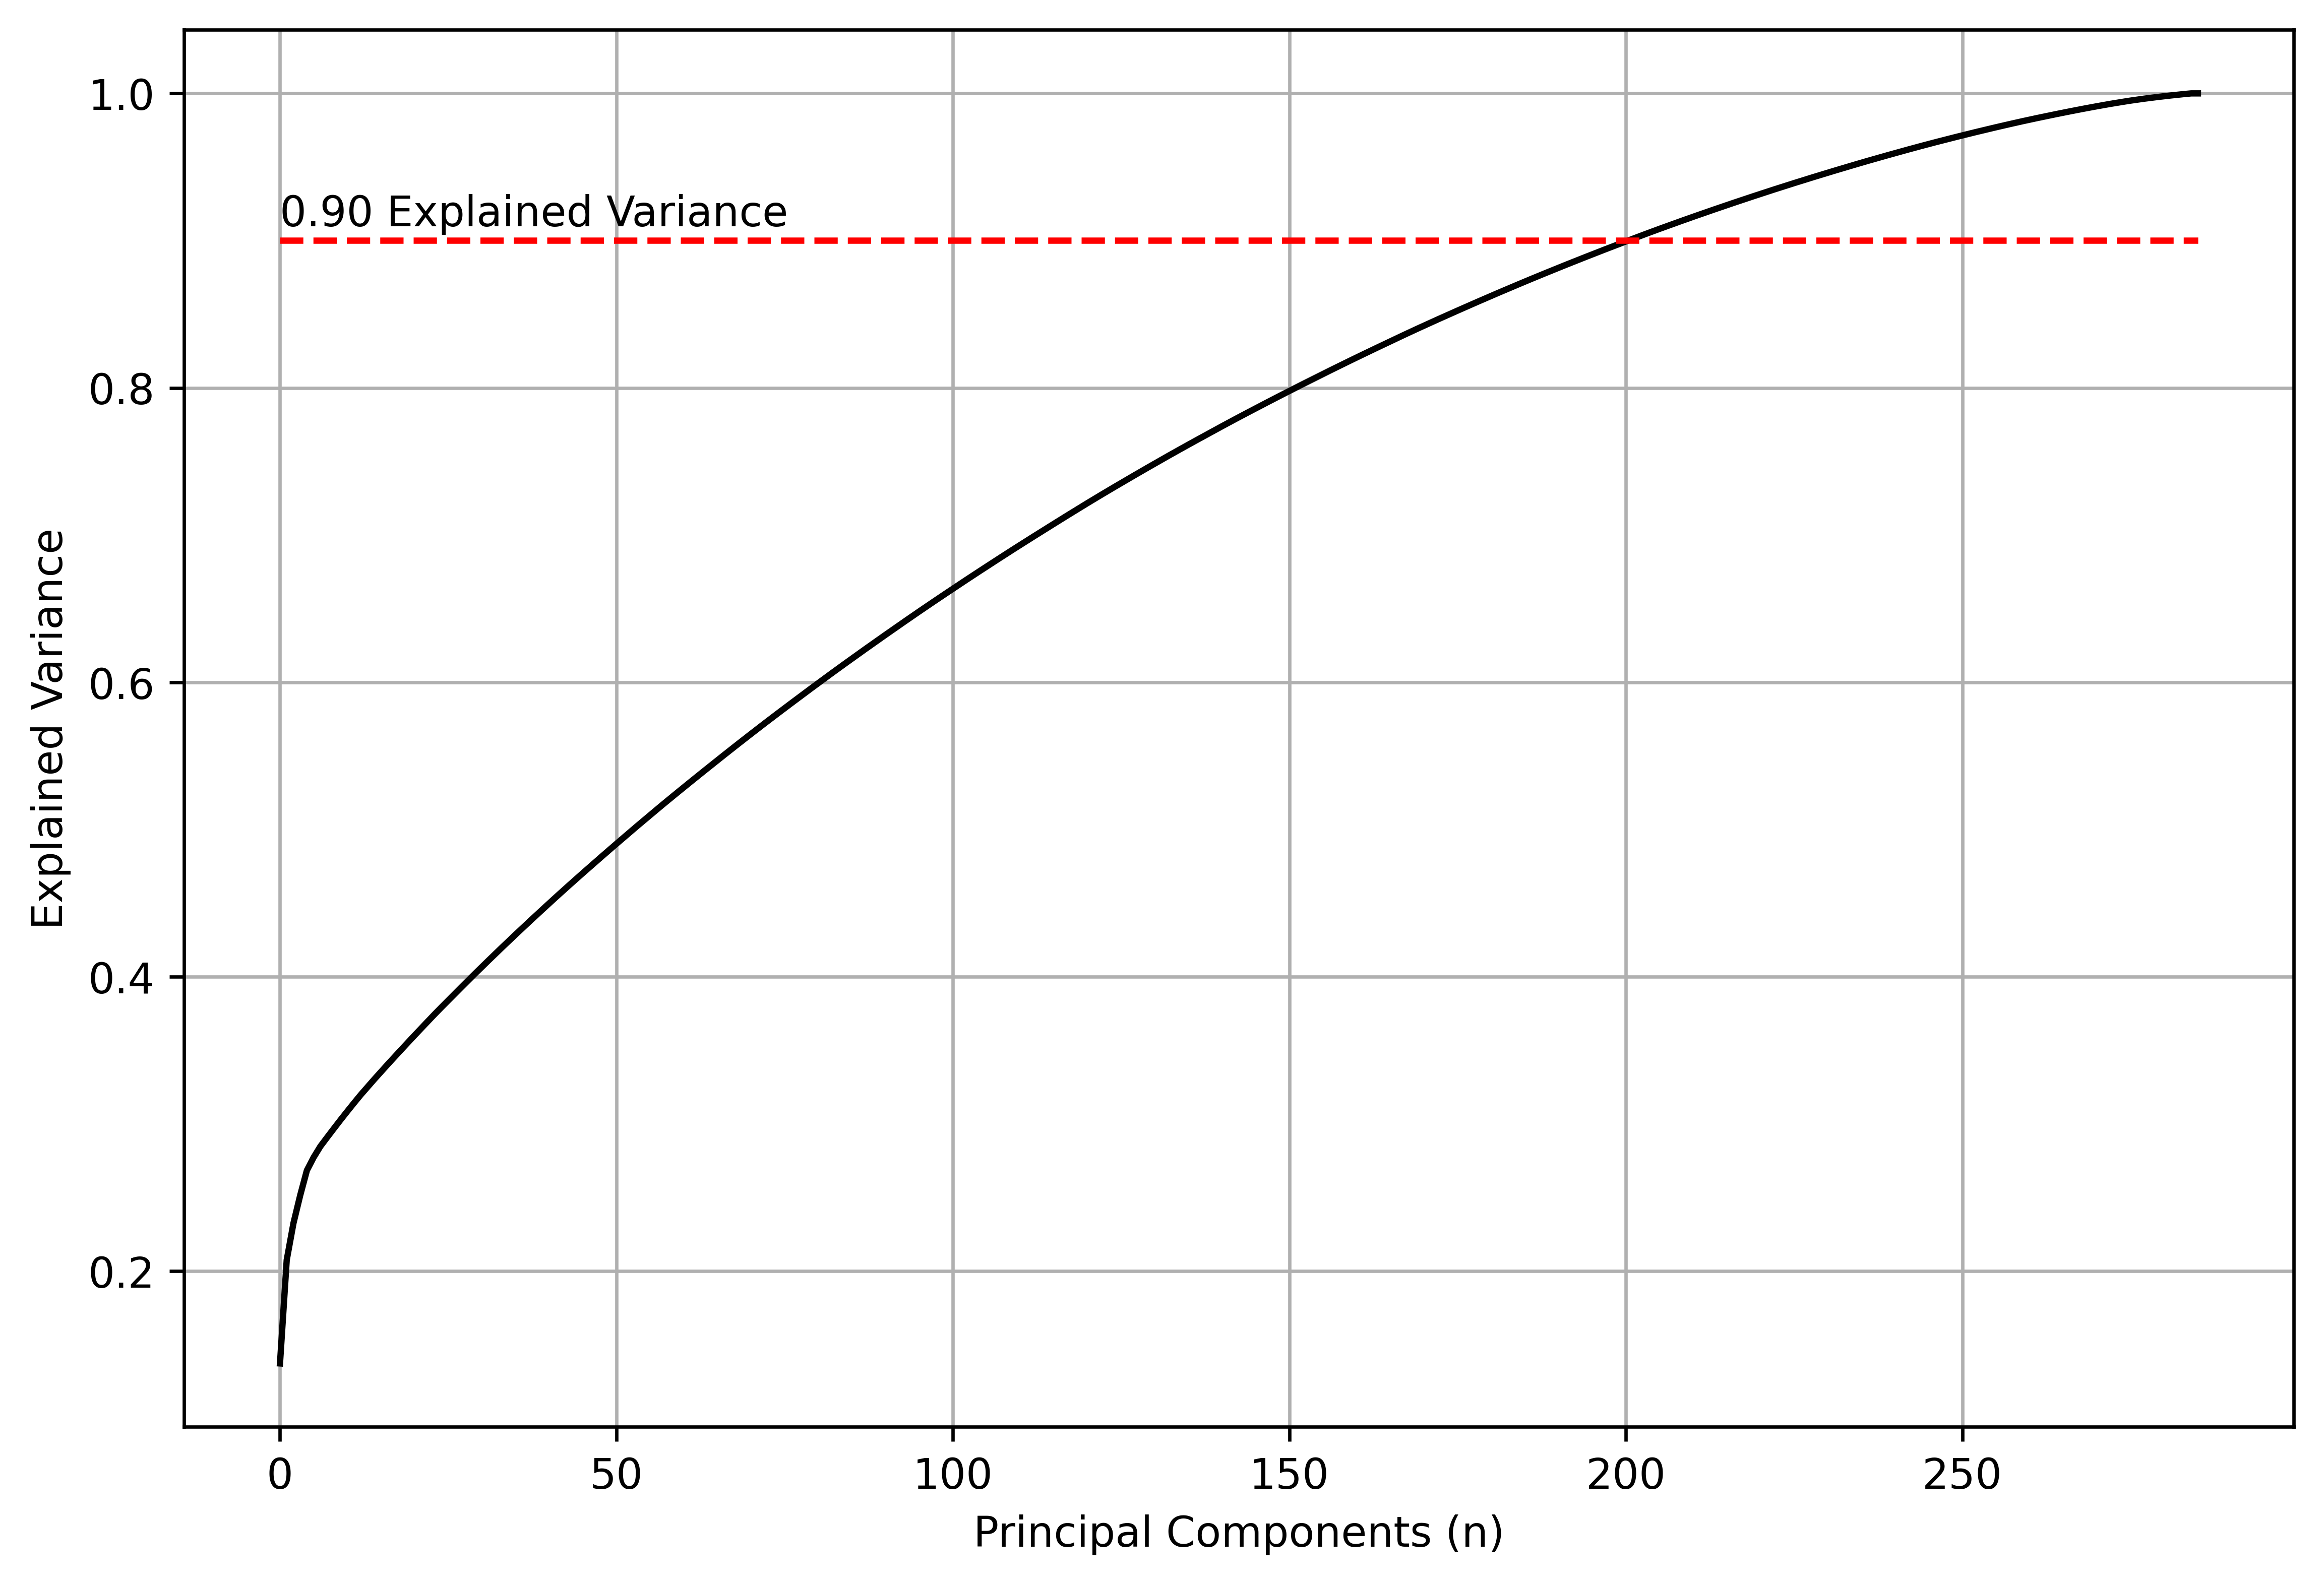

In [9]:
%matplotlib inline
# find out how many principal components are appropriate
pca.fit(df_train_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

#plotting explained variance vs principal components
fig1, ax1 = plt.subplots(figsize=(9,6), dpi=600)
ax1.plot(np.arange(0, 286), cumsum, color='black')
ax1.set_xlabel("Principal Components (n)")
ax1.set_ylabel("Explained Variance")
plt.hlines(0.9, 0, 285, color='red', linestyle="--")
ax1.annotate("0.90 Explained Variance", xy=(0, 0.90), xytext=(0, 0.91))
plt.grid(visible=True)
plt.show()


It looks like 90% of the variance can be explained with 200 principal components, this is a reduction from 286 features.

In [10]:
#fitting pca with 200 pc's
pca_2 = PCA(n_components=200)
df_train_pca = pca_2.fit_transform(df_train_scaled)

## Neural Network Model

For this training exercise the training data will be split between train set and validation set. A keras neural network will be used.

Before splitting the data, the target labels will need to be changed to numerical data types.

In [11]:
from sklearn.preprocessing import LabelEncoder    

In [12]:
labe = LabelEncoder()
labe.fit(train_targets)
encoded_targs = labe.transform(train_targets)

In [13]:
from sklearn.model_selection import train_test_split as tts

In [14]:
#splitting the data
X_train, X_val, y_train, y_val = tts(df_train_pca, encoded_targs, test_size=0.2, random_state=42)
print(X_train.shape)

(19200, 200)


In [15]:
#!pip install --upgrade tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
#creating a function so gridsearch can be used
def build_model(nh_layers=1, nh_neurons=30, input_shape=[X_train.shape[1]]):
    """This function creates a neural network that classifies 10 objects and uses
    the sparse_categorical_crossentropy as the loss function, adam optimizer, and accuracy as a metric.
    ReLU is used as the activation function for the hidden layers"""
    model = Sequential()
    #input layer
    model.add(Dense(200, input_shape=input_shape))
    #creating hidden layers
    for layer in range(int(nh_layers)):
        model.add(Dense(nh_neurons, activation='relu')) #relu is specified here because it is solved fairly quickly
    #creating output layer
    model.add(Dense(10, activation='softmax')) # softmax was chosen for the output layer because classes are exclusive 
    #compiling model
    model.compile(loss="sparse_categorical_crossentropy", #the target labels weren't split so the target column is sparse
                 optimizer='adam', #adam is pretty good optimizer for general use
                 metrics=['accuracy'])
    return model

In [17]:
#!pip install scikeras
from scikeras.wrappers import KerasClassifier

In [18]:
#wrapping up with keras model
model = KerasClassifier(build_fn=build_model, verbose=0)

Now we'll use a random grid search to help tune the hyperparameters for this model.

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from keras.callbacks import EarlyStopping

In [20]:
parameters = {"model__nh_layers":[2, 3, 4, 5],
             "model__nh_neurons": np.arange(200, 250)}
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=2)
param_search = RandomizedSearchCV(model, param_distributions=parameters, n_iter=15, cv=4, scoring='accuracy', error_score='raise')
param_search.fit(X_train, y_train, epochs=10,
                validation_data=(X_val, y_val), callbacks=[early_stop])

RandomizedSearchCV(cv=4, error_score='raise',
                   estimator=KerasClassifier(build_fn=<function build_model at 0x0000024408253AF0>, verbose=0),
                   n_iter=15,
                   param_distributions={'model__nh_layers': [2, 3, 4, 5],
                                        'model__nh_neurons': array([200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
       226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
       239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249])},
                   scoring='accuracy')

In [21]:
#let's display the best parameters
print("Best parameters are\n")
print(param_search.best_params_)
print("Best score for these parameters was\n")
print(param_search.best_score_)

Best parameters are

{'model__nh_neurons': 216, 'model__nh_layers': 3}
Best score for these parameters was

0.8851041666666667


Now that the number of hidden layers and number of neurons has been determined, let's create a learning curve.

In [22]:
a_model = build_model(nh_layers=param_search.best_params_['model__nh_layers'], 
                      nh_neurons=param_search.best_params_['model__nh_neurons'])
history = a_model.fit(X_train, y_train, epochs=15,
           validation_data=(X_val, y_val),
                      verbose=0
           )

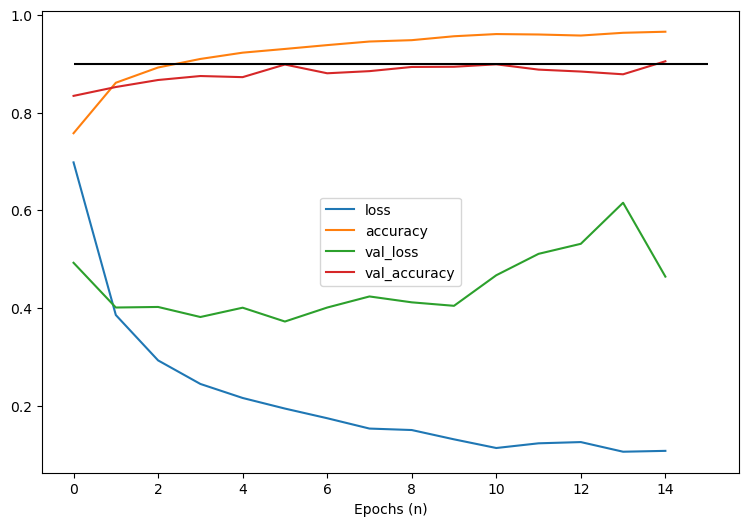

In [23]:
%matplotlib inline
pd.DataFrame(history.history).plot(figsize=(9,6))
plt.xlabel("Epochs (n)")
plt.hlines(0.9, 0, 15, color='black')
plt.show()

Increasing validation loss as the epochs go on.  This is due to the model overfitting the data. Regularization in a new model function will be tried to combat this.

In [24]:
#searching over the whole dataset
X_train, X_val, y_train, y_val = tts(df_train, encoded_targs, test_size=0.2, random_state=42)

In [25]:
#creating a new model function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout #adding regularizing layer
#creating a function so gridsearch can be used
def build_model2(nh_layers=1, nh_neurons=30, input_shape=[X_train.shape[1]], lr=0.001):
    """This function creates a neural network that classifies 10 objects and uses
    the sparse_categorical_crossentropy as the loss function, and accuracy as a metric.
    ReLU is used as the activation function for the hidden layers"""
    model = Sequential()
    #input layer
    model.add(Dense(200, input_shape=input_shape))
    #creating hidden layers
    for layer in range(int(nh_layers)):
        model.add(Dense(nh_neurons, activation='relu')) #relu is specified here because it is solved fairly quickly
        model.add(Dropout(rate=0.6))
    #creating output layer
    model.add(Dense(10, activation='softmax')) # softmax was chosen for the output layer because classes are exclusive 
    #compiling model
    
    model.compile(loss="sparse_categorical_crossentropy", #the target labels weren't split so the target column is sparse
                 metrics=['accuracy'])
    return model

In [26]:
#wrapping up with keras model
model = KerasClassifier(build_fn=build_model2, verbose=0)

In [27]:
parameters = {"model__nh_layers":[2, 3],
             "model__nh_neurons": np.arange(75, 140),
             }
param_search2 = RandomizedSearchCV(model, parameters, n_iter=10, cv=3, scoring='accuracy', error_score='raise')
early_stop2 = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=2)
param_search2.fit(X_train, y_train, epochs=100,
                validation_data=(X_val, y_val),
                callbacks=[early_stop2])

RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=KerasClassifier(build_fn=<function build_model2 at 0x0000024442528EE0>, verbose=0),
                   param_distributions={'model__nh_layers': [2, 3],
                                        'model__nh_neurons': array([ 75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139])},
                   scoring='accuracy')

In [28]:
#let's display the best parameters
print("Best parameters are\n")
print(param_search2.best_params_)
print("Best score for these parameters was\n")
print(param_search2.best_score_)

Best parameters are

{'model__nh_neurons': 116, 'model__nh_layers': 2}
Best score for these parameters was

0.7933333333333333


In [29]:
b_model = build_model2(nh_layers=param_search2.best_params_['model__nh_layers'], 
                       nh_neurons=param_search2.best_params_['model__nh_neurons'],)
historyb = b_model.fit(X_train, y_train, epochs=15,
           validation_data=(X_val, y_val), verbose=0)

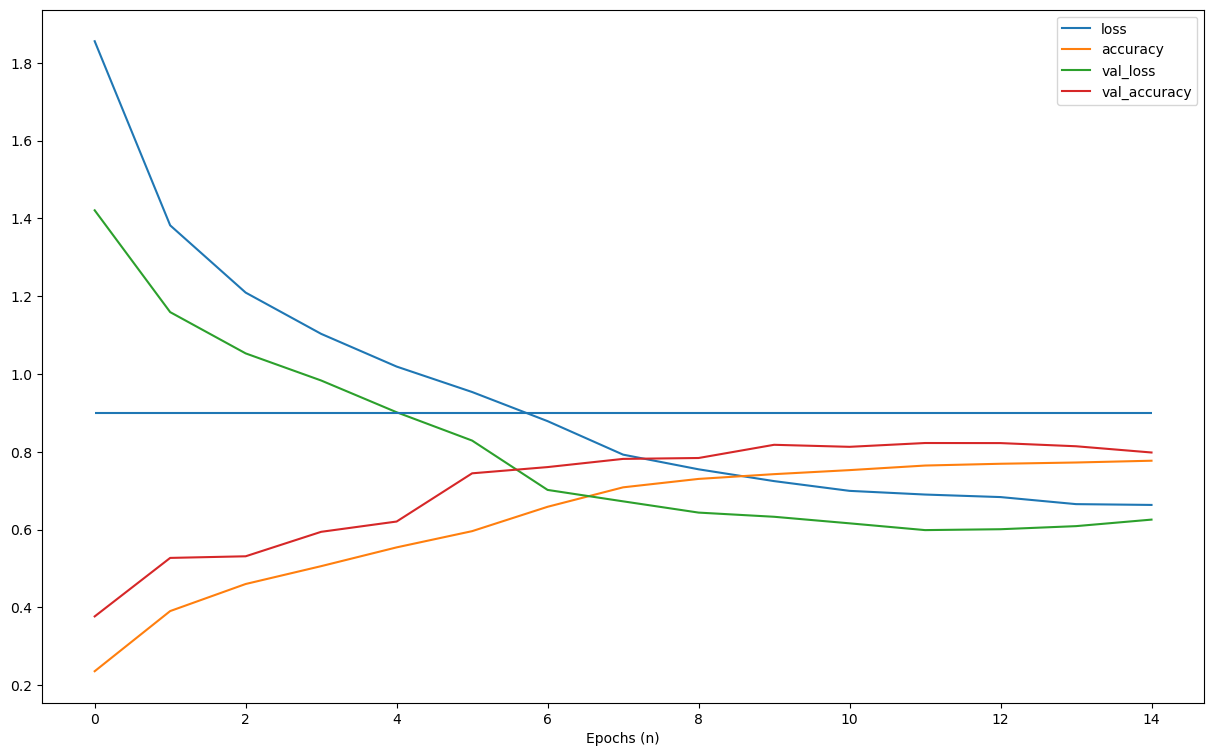

In [30]:
%matplotlib inline
pd.DataFrame(historyb.history).plot(figsize=(15,9))
plt.xlabel("Epochs (n)")
plt.hlines(0.9, 0, 14) 
plt.show()

It seems as though the two neural networks don't perform as well as they could.  A couple things to try moving forward.
    
    1. A 2nd (or 3rd) dimensionality reduction technique
    
    2. Decision trees to replace the NN

### Trying t-SNE

In [31]:
from sklearn.manifold import TSNE

In [32]:
#instantiating tsne
tsne = TSNE(n_components=3, learning_rate=25, perplexity=300.0, random_state=1)

In [33]:
transformed = tsne.fit_transform(df_train_scaled)

In [34]:
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

In [35]:
xs = transformed
dfxs = pd.DataFrame(xs)
ys = train_targets
dfxs['targets'] = ys.tolist()
dfxs.rename(columns={0: "X1", 1:"X2", 2: "X3"}, inplace=True)

Let's plot the feature space and give labels to the data points.

In [37]:
from random import randint

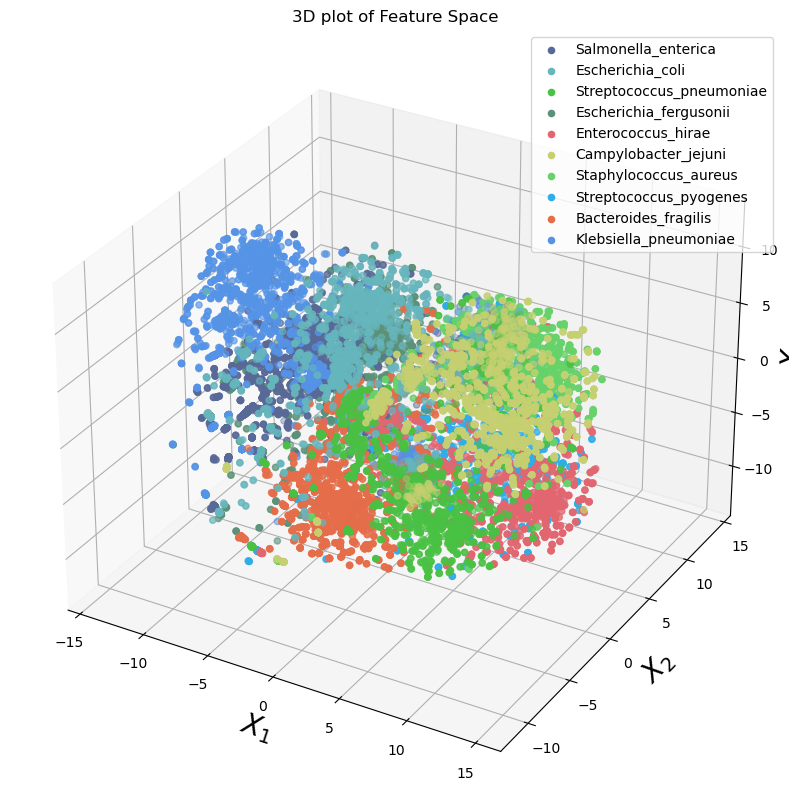

In [38]:
%matplotlib inline
# creating figure
fig3d = plt.figure(figsize=(15,10))

colors = ['#%06X' % randint(0, 0xFFFFFF) for _ in range(len(dfxs['targets'].unique()))]  # Generate enough colors

axed = fig3d.add_subplot(111, projection="3d")
for i, target in enumerate(dfxs['targets'].unique()):
    df_int = dfxs.loc[dfxs['targets'] == target]
    # creating the plot
    three_d_plot = axed.scatter(df_int["X1"], df_int["X2"], df_int["X3"], c=colors[i], label=target )
    
    # setting title and labels
axed.set_title("3D plot of Feature Space")
axed.set_xlabel('$X_{1}$', fontsize=20)
axed.set_ylabel('$X_{2}$', fontsize=20)
axed.set_zlabel('$X_{3}$', fontsize=20)
axed.legend()
axed.grid(True)
plt.show()

The data show t-SNE can decently group the data while only using 3 components. But there seems to be a bit of mixing that could lead to inacurracy. 

In [39]:
#tsne dataset
X_train_tsne, X_val_tsne, y_train_tsne, y_val_tsne = tts(transformed, encoded_targs, test_size=0.2, random_state=42)
seed=1

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [41]:
rnd_clf = RandomForestClassifier(n_jobs=-1)
parameters4 = {"n_estimators": np.arange(450, 550, 10),
    "max_depth":np.arange(2,20, 2),
              "criterion": ["gini", "entropy", "log_loss"]}
param_search4 = RandomizedSearchCV(rnd_clf, parameters4, n_iter=10, cv=3, random_state=42)
param_search4.fit(X_train_tsne, y_train_tsne)

print(param_search4.best_params_)
print(param_search4.best_score_)

{'n_estimators': 530, 'max_depth': 14, 'criterion': 'entropy'}
0.8951041666666667


In [42]:
rnd_clf = RandomForestClassifier(n_estimators=param_search4.best_params_['n_estimators'], 
                                 criterion=param_search4.best_params_['criterion'], 
                                 max_depth=param_search4.best_params_['max_depth'], 
                                 n_jobs=-1)
rnd_clf.fit(X_train_tsne, y_train_tsne)
y_pred_clf = rnd_clf.predict(X_val_tsne)
accuracy = accuracy_score(y_val_tsne, y_pred_clf)

print("{}% accuracy is given by the randomforest regressor".format(round(accuracy*100,1)))


90.9% accuracy is given by the randomforest regressor


Let's visualize the confusion matrix now.

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
le_dict = dict(zip(labe.transform(labe.classes_), labe.classes_))

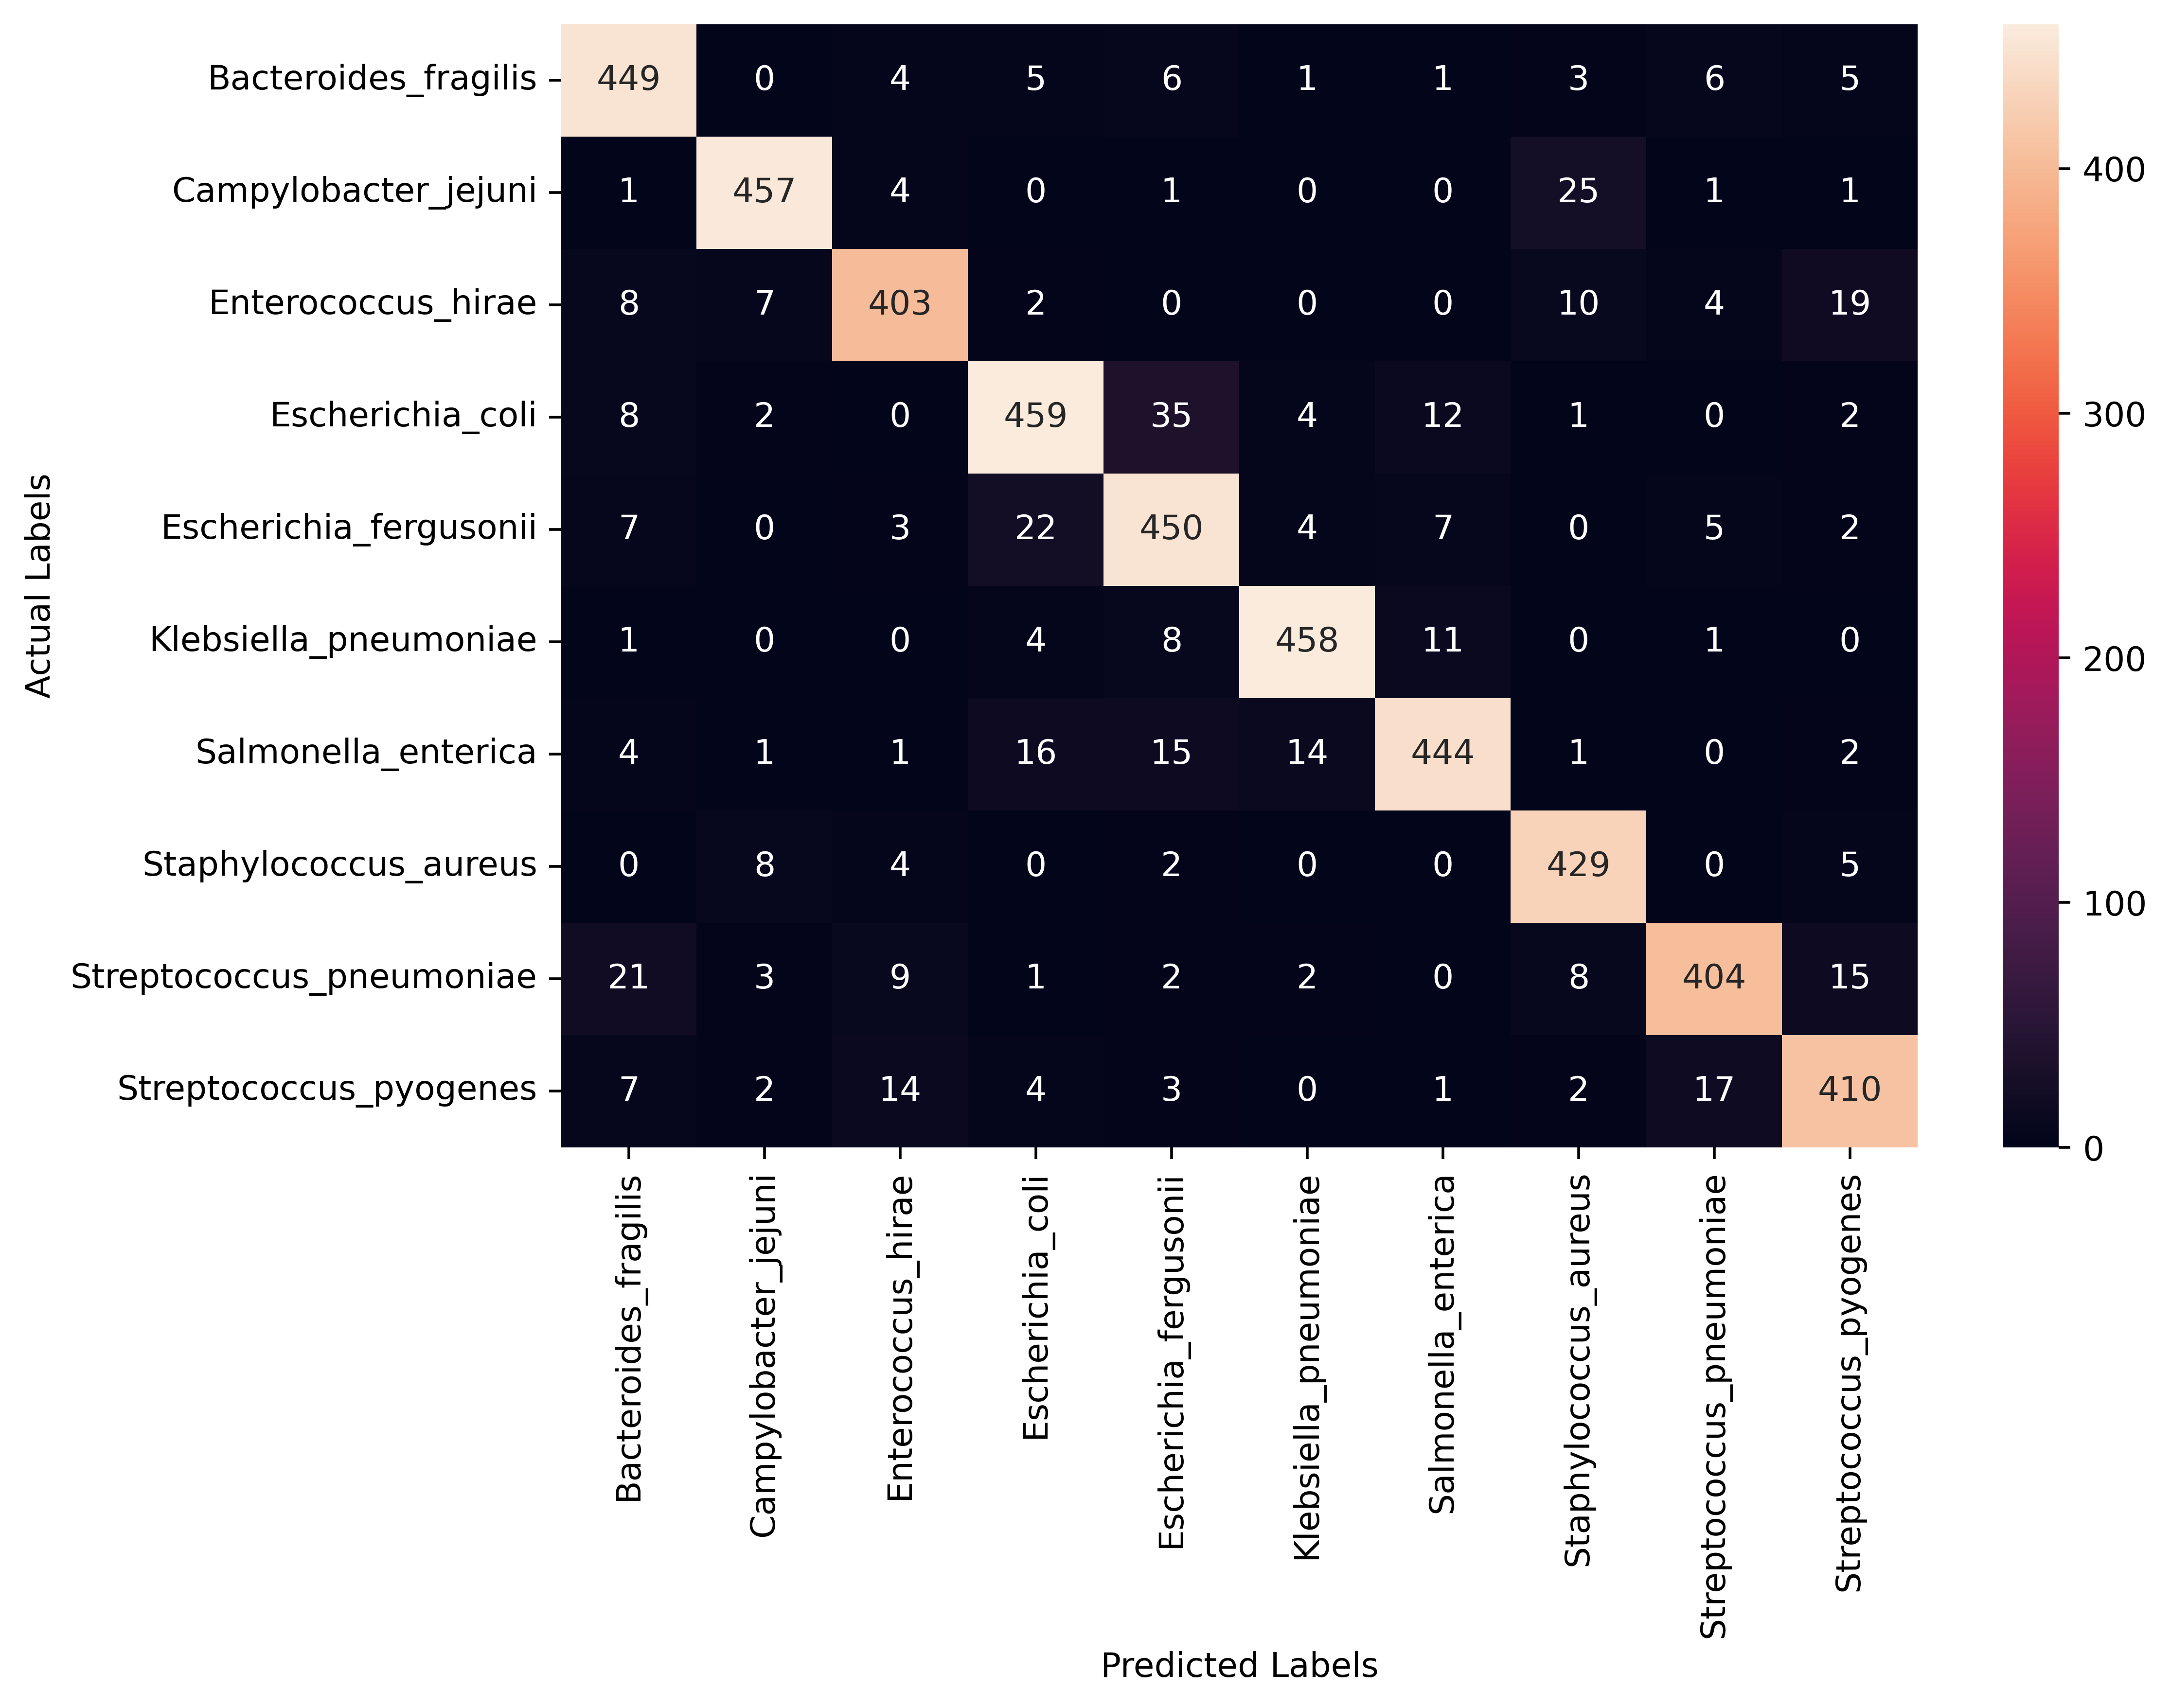

In [45]:
%matplotlib inline
conf_mtx = confusion_matrix(y_val_tsne, y_pred_clf)
cm_df = pd.DataFrame(conf_mtx)
cm_df.rename(columns=le_dict, inplace=True)
cm_df['Actual Values'] = le_dict.values()
cm_df.set_index("Actual Values", inplace=True, drop=True)
fig_mtx, ax_mtx = plt.subplots(figsize=(9,6), dpi=500)
sns.heatmap(cm_df, annot=True, fmt="g", ax=ax_mtx)
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# Discussion

The data provided included 286 variable features containing genetic information, 1 feature called row ID, and 1 feature that contained the bacteria classes.  In total there were 10 classes of bacteria with a total of 23,999 instances.  


The data in can be considered sparse, as many features contain 0.  Therefore, the data was standardized by dividing the difference between the feature mean and the actual instance value then dividing by the feature standard deviation. This was done to to ensure 1 feature of data does not overinfluence the explained variability when attempting to perform dimensionality reduction. 


Initially, to reduce the complexity of the data, dimensionality reduction using principal component analysis (PCA) was used prior to model training. The number of features that explained 90% variance was determined to be 200, however, this dataset was still fairly complex. Two neural network models were constructed, the first being simpler in terms of input variables. The second allowed for more flexibility by increasing the number of variables that can be changed. However, both models proved to be too complex no matter which variables provided the highest accuracy (88%). It turned out that the despite having a high accuracy the "best" set of parameters would continuously overtrain the data, and lead to increased loss in the validation set. Therefore a new dimensionality technique and classifier model was used. 

A discussion with colleagues yielded that t-SNE might provide a better reduced dataset. As before, the standardized dataset was transformed using t-SNE down to 3 dimensions. Initially, 2 dimensiones were used but since 2 classes of bacteria (Excherichia fergusonii, and Escherichia coli) were shown to have significant overlap with the data was plotted. To reduce this overlap, a 3rd dimension was implemented to add more variability.


The final model used was an ensemble random forest classifier that uses several decision trees and different bootstrap samples to train each decision tree. The results yielded a 91% accuracy with the biggest contribution to the loss surrounding the classification of the 2 aforementioned classes.  